In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
from os import walk

In [27]:
filenames = next(walk('../data/3/Orientierungszeiten'))[2]
data = {}
for i, filename in enumerate(filenames):
    data[float(filename.replace(',', '.'))] = np.loadtxt('../data/3/Orientierungszeiten/' + filename)

{31.0: array([[ 0.000e+00, -2.280e+01,  9.600e-03],
        [ 1.000e-05, -2.280e+01,  1.000e-02],
        [ 2.000e-05, -2.280e+01,  9.200e-03],
        ...,
        [ 2.497e-02, -2.320e+01, -4.800e-03],
        [ 2.498e-02, -2.320e+01, -5.200e-03],
        [ 2.499e-02, -2.320e+01, -4.800e-03]]),
 53.0: array([[ 0.000e+00,  2.560e+01,  1.080e-02],
        [ 4.000e-06,  2.560e+01,  1.160e-02],
        [ 8.000e-06,  2.520e+01,  1.080e-02],
        ...,
        [ 9.988e-03, -2.440e+01, -3.280e-02],
        [ 9.992e-03, -2.440e+01, -3.320e-02],
        [ 9.996e-03, -2.440e+01, -3.280e-02]]),
 73.0: array([[ 0.000e+00,  2.560e+01, -2.400e-03],
        [ 4.000e-06,  2.520e+01, -2.800e-03],
        [ 8.000e-06,  2.560e+01, -3.600e-03],
        ...,
        [ 9.988e-03, -2.360e+01,  2.000e-03],
        [ 9.992e-03, -2.360e+01,  2.800e-03],
        [ 9.996e-03, -2.320e+01,  1.600e-03]])}

3.2731123698155313
2.9226356389098003
2.688667573850165


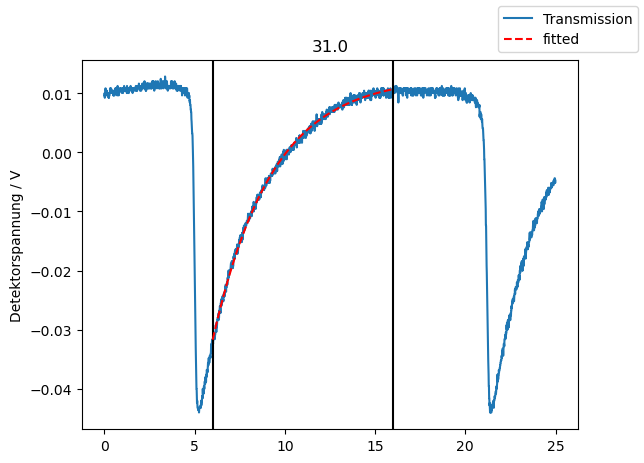

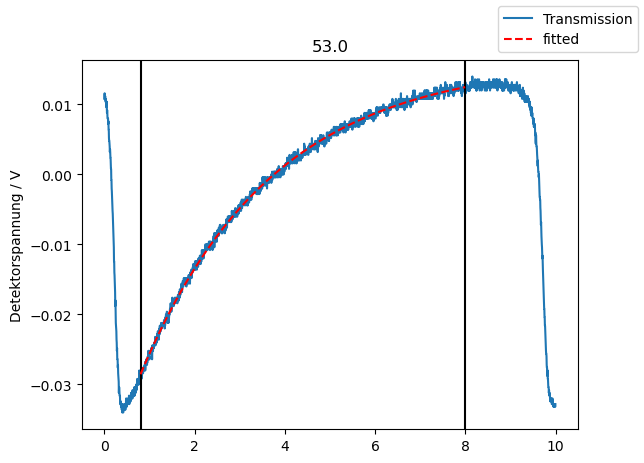

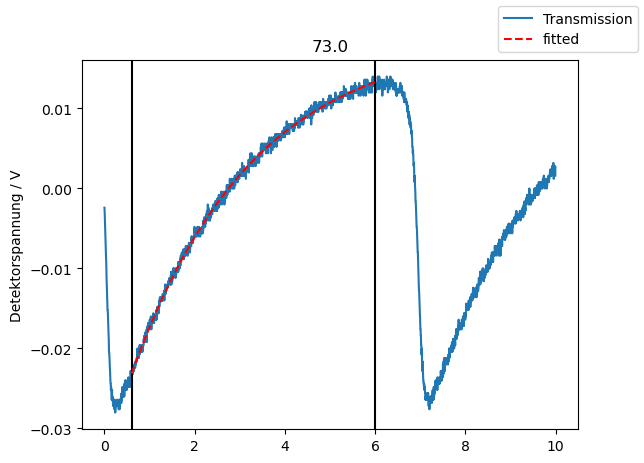

In [44]:
ranges = {31.0 : [600, 1600], 53.0 : [200, 2000], 73.0 : [150, 1500] }
for f in data:
    fig, ax1 = plt.subplots()
    transmission = data[f][:, 2]
    time = data[f][:, 0] * 1e3
    magnetic_field = data[f][:, 1] / 10

    def monoExp(x, m, t, b):
       return m * np.exp(- x / t) + b

    p0 = (0.5, 3, 2.25) # start with values near those we expect
    params, cv = scipy.optimize.curve_fit(monoExp, time[ranges[f][0]:ranges[f][1]], transmission[ranges[f][0]:ranges[f][1]], p0)
    m, t, b = params

    ax1.plot(time, transmission, label='Transmission')
    ax1.axvline(time[ranges[f][0]], c='k')
    ax1.axvline(time[ranges[f][1]], c='k')
    ax1.set(ylabel='Detektorspannung / V', title=f)

    ax1.plot(time[ranges[f][0]:ranges[f][1]], monoExp(time[ranges[f][0]:ranges[f][1]], m, t, b), 'r--', label="fitted")
    #ax2 = ax1.twinx()
    #ax2.set(ylabel='Spulenspannung U / V')
    #ax2.plot(time, magnetic_field, c='r',label='Spulenspannung')
    print(t)
    fig.legend()